In [34]:
pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/626.3 kB 495.5 kB/s eta 0:00:02
   ----------- ---------------------------- 174.1/626.3 kB 1.3 MB/s eta 0:00:01
   ------------------------ --------------- 389.1/626.3 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


   Year  Model                                             Review
0  2009  Honda  Although arguably the first-generation Insight...
1  2009  Honda  2009 Honda Accord EX-L 4  : This car is very c...
2  2010  Honda  I have owed and driven Honda products for 20 y...
3  2010  Honda  Honda Accord Euro L : The seats are average, b...
4  2011  Honda   Honda HR-V: Continuous variable transmission ...
Index(['Year', 'Model', 'Review'], dtype='object')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pratik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pratik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pratik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Pratik\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


   Year  Model                                             Review  \
0  2009  Honda  Although arguably the first-generation Insight...   
1  2009  Honda  2009 Honda Accord EX-L 4  : This car is very c...   
2  2010  Honda  I have owed and driven Honda products for 20 y...   
3  2010  Honda  Honda Accord Euro L : The seats are average, b...   
4  2011  Honda   Honda HR-V: Continuous variable transmission ...   

                                   Processed_Content  \
0  although arguably firstgeneration insight hybr...   
1  honda accord exl car comfortable sporty cylind...   
2  owed driven honda product year purchased vehic...   
3  honda accord euro l seat average little rear l...   
4  honda hrv continuous variable transmission fai...   

                                           Sentiment  Negative  Neutral  \
0  {'neg': 0.089, 'neu': 0.8, 'pos': 0.111, 'comp...     0.089    0.800   
1  {'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'comp...     0.000    0.595   
2  {'neg': 0.216, 'neu'

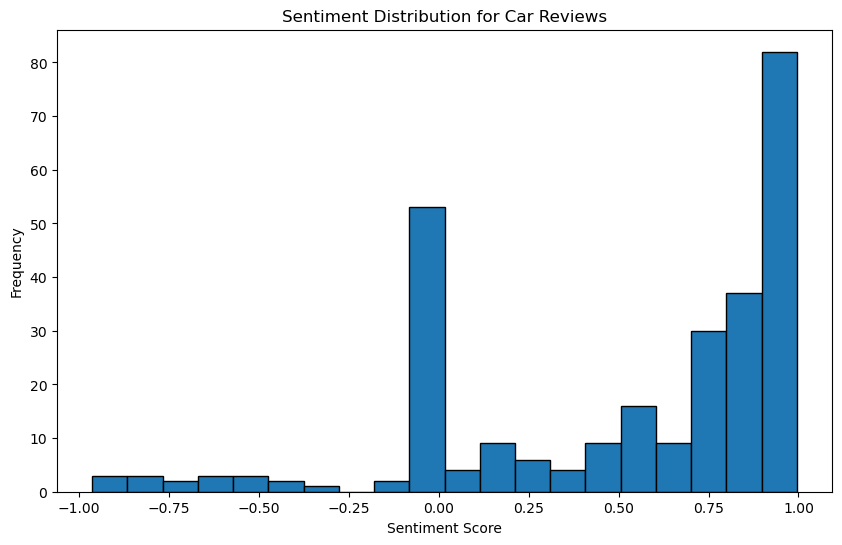

Average Sentiment Scores for Each Model:
Model
Acura        0.523645
Alfa         0.452864
Audi         0.901536
BMW          0.620110
Bentley      0.983082
Buick        0.645445
Cadillac     0.578970
Chevrolet    0.684910
Chrysler     0.203082
Dodge       -0.143018
Ferrari      0.336109
Fiat         0.468036
Ford         0.688214
GMC          0.536955
Genesis      0.369286
Honda        0.247614
Honda        0.989500
Hyundai      0.544100
Name: Compound, dtype: float64
Common Words in Positive Honda Reviews:
[('car', 14), ('honda', 7), ('comfortable', 5), ('good', 5), ('though', 4), ('km', 3), ('tyre', 3), ('ride', 3), ('low', 3), ('height', 3)]
Common Words in Negative Honda Reviews:
[('honda', 6), ('headrest', 3), ('product', 2), ('seat', 2), ('minute', 2), ('forced', 2), ('car', 2), ('dealer', 2), ('gear', 2), ('problem', 2)]
Business Recommendations for Acura:
- Acura has a strong positive sentiment among customers. Continue to emphasize the features and services that customers app

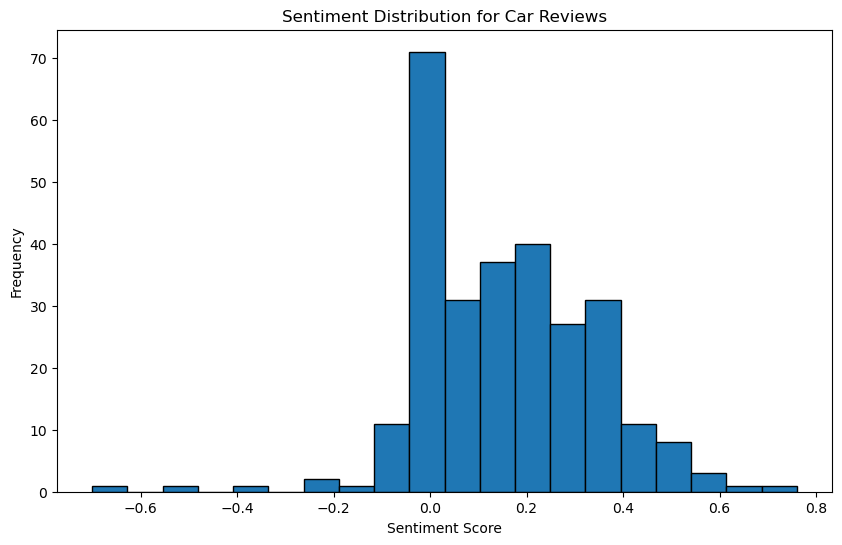

Average Sentiment Scores for Each Model:
Model
Acura        0.128322
Alfa         0.087360
Audi         0.198724
BMW          0.166552
Bentley      0.279003
Buick        0.169852
Cadillac     0.172734
Chevrolet    0.251800
Chrysler     0.060390
Dodge        0.009554
Ferrari      0.129825
Fiat         0.138546
Ford         0.098742
GMC          0.184755
Genesis      0.123684
Honda        0.124767
Honda        0.328556
Hyundai      0.211930
Name: Polarity, dtype: float64


In [41]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from collections import Counter

# Load the dataset with a specified encoding
file_path = 'C:/Users/Pratik/Downloads/archive (1)/Car_Reviews_Database.csv'
car_reviews = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataset
print(car_reviews.head())

# Display the column names
print(car_reviews.columns)

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, float):  # Handle non-string values
        return ''
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]
    return ' '.join(tokens)

# Fill missing values and convert to strings
car_reviews['Review'] = car_reviews['Review'].fillna('').astype(str)

# Preprocess the reviews
car_reviews['Processed_Content'] = car_reviews['Review'].apply(preprocess_text)

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores

# Apply sentiment analysis to reviews
car_reviews['Sentiment'] = car_reviews['Processed_Content'].apply(get_sentiment)

# Extract individual sentiment scores
car_reviews['Negative'] = car_reviews['Sentiment'].apply(lambda x: x['neg'])
car_reviews['Neutral'] = car_reviews['Sentiment'].apply(lambda x: x['neu'])
car_reviews['Positive'] = car_reviews['Sentiment'].apply(lambda x: x['pos'])
car_reviews['Compound'] = car_reviews['Sentiment'].apply(lambda x: x['compound'])

# Display the first few rows with sentiment scores
print(car_reviews.head())

# Function to categorize sentiment
def categorize_sentiment(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound > -0.05 and compound < 0.05:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the categorization
car_reviews['Sentiment_Label'] = car_reviews['Compound'].apply(categorize_sentiment)

# Display the first few rows with sentiment labels
print(car_reviews.head())

# Function to plot sentiment distribution
def plot_sentiment_distribution(data, title):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=20, edgecolor='black')
    plt.title(title)
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

# Plot sentiment distribution for the entire dataset
plot_sentiment_distribution(car_reviews['Compound'], 'Sentiment Distribution for Car Reviews')

# Calculate average sentiment for each model
average_sentiment = car_reviews.groupby('Model')['Compound'].mean()

print("Average Sentiment Scores for Each Model:")
print(average_sentiment)

# Identify key themes in positive and negative reviews
def get_common_words(data, sentiment_threshold, top_n=10):
    positive_reviews = data[data['Compound'] > sentiment_threshold]['Processed_Content']
    negative_reviews = data[data['Compound'] < -sentiment_threshold]['Processed_Content']
    
    positive_words = ' '.join(positive_reviews).split()
    negative_words = ' '.join(negative_reviews).split()
    
    positive_common_words = Counter(positive_words).most_common(top_n)
    negative_common_words = Counter(negative_words).most_common(top_n)
    
    return positive_common_words, negative_common_words

# Get common words in positive and negative reviews for a specific model (e.g., 'Honda')
positive_common_words, negative_common_words = get_common_words(car_reviews[car_reviews['Model'] == 'Honda'], 0.5)

print("Common Words in Positive Honda Reviews:")
print(positive_common_words)
print("Common Words in Negative Honda Reviews:")
print(negative_common_words)

# Recommendations for each model based on sentiment analysis
recommendations = {}

for model, sentiment in average_sentiment.items():
    recs = []
    if sentiment > 0.5:
        recs.append(f"{model} has a strong positive sentiment among customers. Continue to emphasize the features and services that customers appreciate.")
    if sentiment < 0.0:
        recs.append(f"There is a notable negative sentiment towards {model}. Focus on addressing customer complaints, particularly those related to common issues.")
    
    # Analyze common themes in positive and negative reviews
    positive_common_words, negative_common_words = get_common_words(car_reviews[car_reviews['Model'] == model], 0.5)
    
    for word, count in negative_common_words:
        recs.append(f"Address customer concerns related to '{word}', as it frequently appears in negative reviews.")
    
    recommendations[model] = recs

# Print recommendations for each model
for model, recs in recommendations.items():
    print(f"Business Recommendations for {model}:")
    for rec in recs:
        print(f"- {rec}")
    print()
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
from collections import Counter

# Load the dataset with a specified encoding
file_path = 'C:/Users/Pratik/Downloads/archive (1)/Car_Reviews_Database.csv'
car_reviews = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataset
print(car_reviews.head())

# Clean the column name to remove trailing spaces
car_reviews.rename(columns={'Model ': 'Model'}, inplace=True)

# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, float):  # Handle non-string values
        return ''
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    return text.lower()

# Fill missing values and convert to strings
car_reviews['Review'] = car_reviews['Review'].fillna('').astype(str)

# Preprocess the reviews
car_reviews['Processed_Content'] = car_reviews['Review'].apply(preprocess_text)

# Function to get sentiment scores using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis to reviews
car_reviews['Polarity'], car_reviews['Subjectivity'] = zip(*car_reviews['Processed_Content'].map(get_sentiment))

# Function to categorize sentiment
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the categorization
car_reviews['Sentiment_Label'] = car_reviews['Polarity'].apply(categorize_sentiment)

# Display the first few rows with sentiment labels
print(car_reviews.head())

# Function to plot sentiment distribution
def plot_sentiment_distribution(data, title):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=20, edgecolor='black')
    plt.title(title)
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

# Plot sentiment distribution for the entire dataset
plot_sentiment_distribution(car_reviews['Polarity'], 'Sentiment Distribution for Car Reviews')

# Calculate average sentiment for each model
average_sentiment = car_reviews.groupby('Model')['Polarity'].mean()

print("Average Sentiment Scores for Each Model:")
print(average_sentiment)

# Identify key themes in positive and negative reviews
def get_common_words(data, sentiment_threshold, top_n=10):
    positive_reviews = data[data['Polarity'] > sentiment_threshold]['Processed_Content']
    negative_reviews = data[data['Polarity'] < -sentiment_threshold]['Processed_Content']
    
    positive_words = ' '.join(positive_reviews).split()
    negative_words = ' '.join(negative_reviews).split()
    
    positive_common_words = Counter(positive_words).most_common(top_n)
    negative_common_words = Counter(negative_words).most_common(top_n)
    
    return positive_common_words,


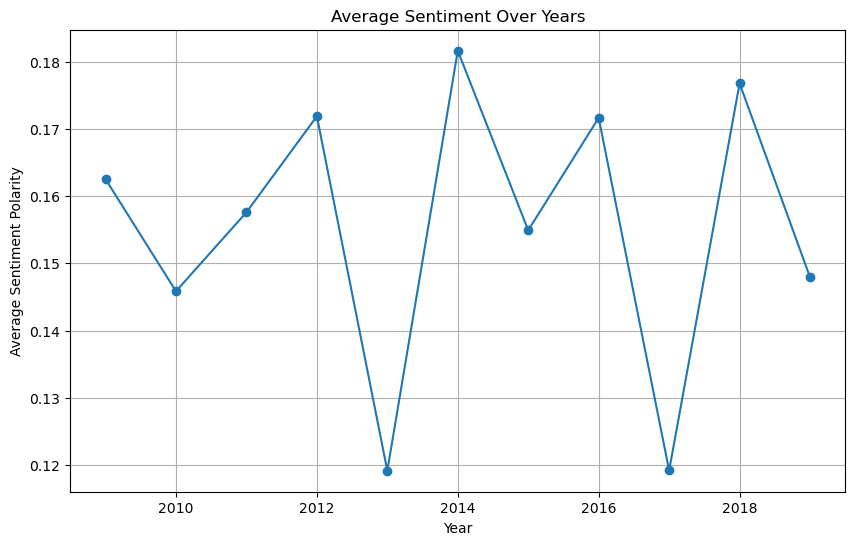

In [43]:
import matplotlib.dates as mdates

# Convert Year to datetime
car_reviews['Year'] = pd.to_datetime(car_reviews['Year'], format='%Y')

# Group by year and calculate the mean polarity
yearly_sentiment = car_reviews.groupby(car_reviews['Year'].dt.year)['Polarity'].mean()

# Plotting the yearly sentiment trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_sentiment.index, yearly_sentiment.values, marker='o')
plt.title('Average Sentiment Over Years')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Polarity')
plt.grid(True)
plt.show()


In [50]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


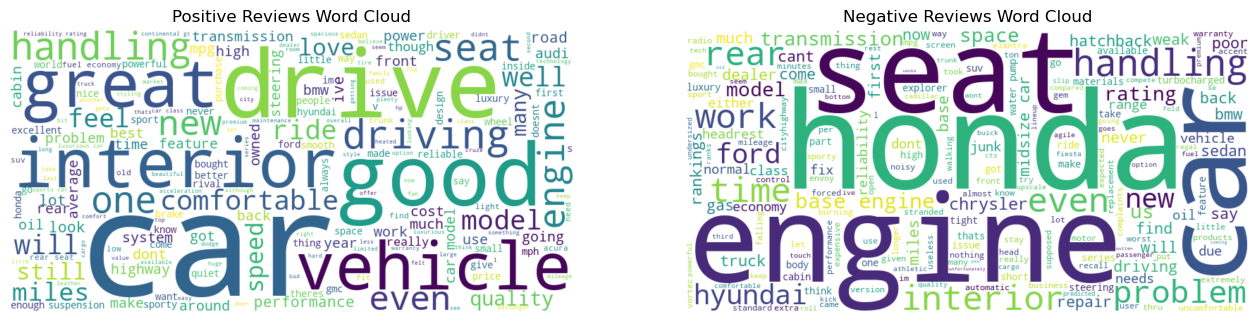

In [51]:
from wordcloud import WordCloud

# Generate word cloud for positive reviews
positive_reviews = ' '.join(car_reviews[car_reviews['Polarity'] > 0]['Processed_Content'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Generate word cloud for negative reviews
negative_reviews = ' '.join(car_reviews[car_reviews['Polarity'] < 0]['Processed_Content'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plot the word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorize the processed content
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(car_reviews['Processed_Content'])

# Cluster the reviews using KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
car_reviews['Cluster'] = kmeans.fit_predict(X)

# Analyze the clusters
for cluster in range(5):
    print(f"Cluster {cluster}:")
    cluster_reviews = car_reviews[car_reviews['Cluster'] == cluster]
    common_words = get_common_words(cluster_reviews, 0, top_n=10)
    print("Common Words:", common_words)
    print()


C:\Users\Pratik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0:
Common Words: ([('the', 519), ('and', 327), ('a', 270), ('to', 218), ('i', 199), ('is', 178), ('it', 175), ('of', 141), ('in', 125), ('car', 113)],)

Cluster 1:
Common Words: ([('the', 14), ('and', 12), ('to', 9), ('handling', 9), ('interior', 8), ('a', 7), ('is', 5), ('powerful', 5), ('with', 5), ('more', 4)],)

Cluster 2:
Common Words: ([('the', 58), ('and', 41), ('of', 22), ('handling', 21), ('its', 19), ('a', 19), ('it', 17), ('in', 15), ('car', 15), ('class', 15)],)

Cluster 3:
Common Words: ([('the', 329), ('and', 126), ('a', 102), ('of', 88), ('is', 73), ('to', 67), ('with', 60), ('its', 50), ('in', 45), ('on', 43)],)

Cluster 4:
Common Words: ([('the', 250), ('a', 141), ('car', 137), ('is', 127), ('and', 125), ('to', 96), ('i', 94), ('in', 84), ('of', 82), ('for', 74)],)



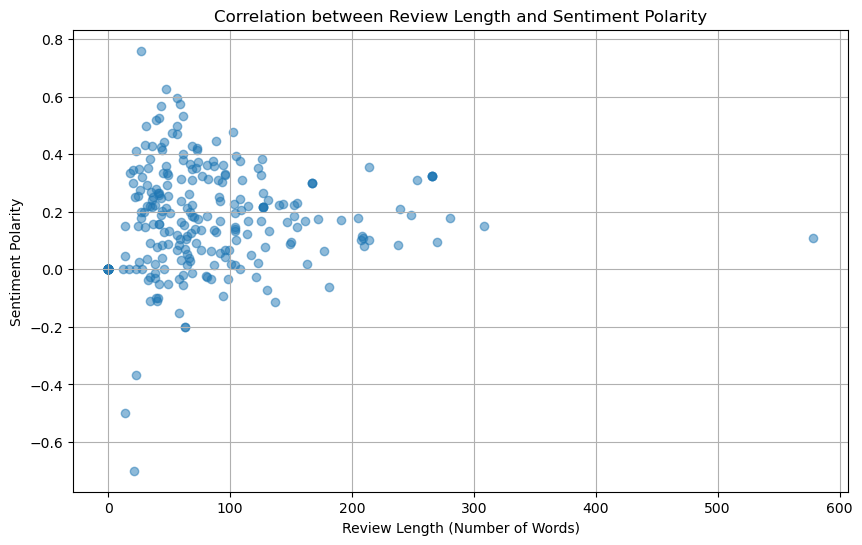

In [58]:
# Calculate review length
car_reviews['Review_Length'] = car_reviews['Processed_Content'].apply(lambda x: len(x.split()))

# Plot correlation between review length and sentiment
plt.figure(figsize=(10, 6))
plt.scatter(car_reviews['Review_Length'], car_reviews['Polarity'], alpha=0.5)
plt.title('Correlation between Review Length and Sentiment Polarity')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Sentiment Polarity')
plt.grid(True)
plt.show()


In [60]:
# Function to get top N reviews
def get_top_n_reviews(data, model, n=5):
    model_reviews = data[data['Model'] == model]
    top_positive_reviews = model_reviews.nlargest(n, 'Polarity')[['Review', 'Polarity']]
    top_negative_reviews = model_reviews.nsmallest(n, 'Polarity')[['Review', 'Polarity']]
    return top_positive_reviews, top_negative_reviews

# Get top reviews for a specific model
model = 'Honda'
top_positive, top_negative = get_top_n_reviews(car_reviews, model)

print(f"Top {len(top_positive)} Positive Reviews for {model}:")
print(top_positive)
print(f"\nTop {len(top_negative)} Negative Reviews for {model}:")
print(top_negative)


Top 5 Positive Reviews for Honda:
                                               Review  Polarity
1   2009 Honda Accord EX-L 4  : This car is very c...  0.760000
16  Honda HR-V GH1 1.6: Fell in love with this whe...  0.427778
10  Honda Ballade 150i 16v: The car really rides v...  0.385000
11  A CUV built to a very specific taste. It makes...  0.333333
0   Although arguably the first-generation Insight...  0.291667

Top 5 Negative Reviews for Honda:
                                               Review  Polarity
4    Honda HR-V: Continuous variable transmission ... -0.500000
2   I have owed and driven Honda products for 20 y... -0.115069
18  Honda CR-V : Water pump seized, left us strand... -0.111111
5   Not much has changed with the historically sec... -0.050000
17  The Honda's angular interior is architectural,... -0.030093


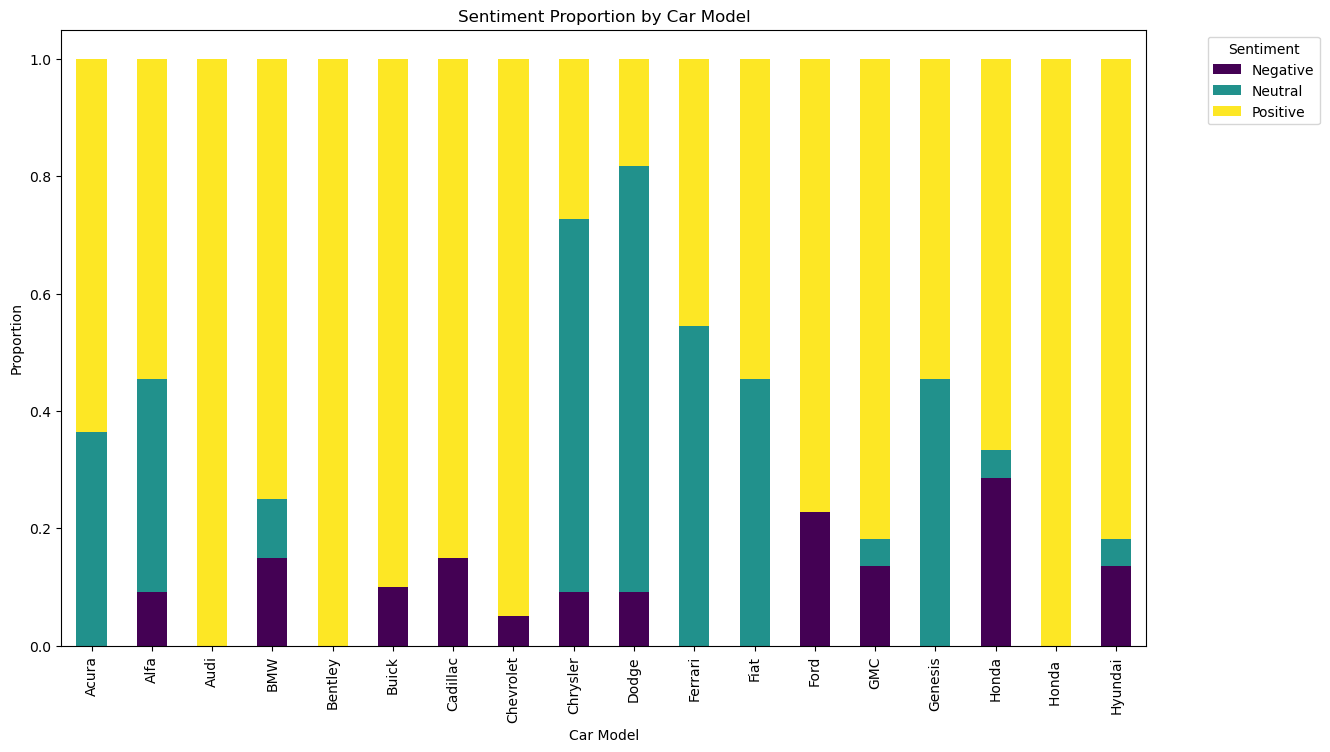

In [62]:
# Calculate the sentiment proportion
sentiment_proportion = car_reviews.groupby(['Model', 'Sentiment_Label']).size().unstack().fillna(0)
sentiment_proportion = sentiment_proportion.div(sentiment_proportion.sum(axis=1), axis=0)

# Plotting the sentiment proportion by model
sentiment_proportion.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Sentiment Proportion by Car Model')
plt.xlabel('Car Model')
plt.ylabel('Proportion')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()


In [64]:
# Calculate the correlation matrix of sentiment scores
sentiment_correlation = car_reviews.pivot_table(index='Year', columns='Model', values='Polarity').corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Sentiment Scores Between Car Models')
plt.show()


NameError: name 'sns' is not defined

<Figure size 1200x800 with 0 Axes>